In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load frames

In [6]:
isttc_results_folder_path = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\allen_mice\\'

In [7]:
sttc_df = pd.read_pickle(isttc_results_folder_path + 'not_binned_sttc\\' + 'tau_bsl_sua_sttc_50ms_20lags_df.pkl')
pearson_df = pd.read_pickle(isttc_results_folder_path + 'binned_pearson\\' + 'tau_bsl_sua_pearson_50ms_20lags_df.pkl')

In [8]:
sttc_df.head()

,animal_id,unit_id,acf,acf_decay_1_4,popt,pcov,r_squared,tau,tau_ms,acf_0,...,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,popt_0,popt_1,popt_2,acf_fit_failed
0,950911624,950911624,"[1.0, 0.13281128922488727, 0.3354336018558046,...",False,"[-92619.74939220697, 13.565652113424362, 0.251...","[[4.1629181668993945e+20, -4527039727674827.0,...",0.414461,0.073716,3.685779,1.0,...,0.223830,0.227527,0.228353,0.218092,0.216691,0.217180,-92619.749392,13.565652,0.251724,False
1,950911641,950911641,"[1.0, 0.2857279473493322, 0.43939745326464574,...",False,"[-60398.15160174246, 13.526487084894, 0.366369...","[[2.4213455984782996e+20, -4040104714688370.0,...",0.323411,0.073929,3.696451,1.0,...,0.347403,0.350350,0.340420,0.339468,0.340654,0.332895,-60398.151602,13.526487,0.366370,False
2,950911657,950911657,"[1.0, -0.5000510982070316, 0.01789978595243458...",False,"[-34.78791502992349, 4.186567029829759, 0.0286...","[[11250.012212236956, -323.7608124022832, 0.13...",0.964727,0.238859,11.942959,1.0,...,0.031824,0.020337,0.026289,0.025492,0.026313,0.018721,-34.787915,4.186567,0.028648,False
3,950911686,950911686,"[1.0, 0.15936236988602004, -0.1965967445526764...",False,"[133813.7697226617, 13.67218318289545, 0.00492...","[[2.2978726377474902e+21, 1.7319714132531534e+...",0.252137,0.073141,3.657060,1.0,...,0.020307,0.010658,0.011371,0.008088,0.020458,0.006385,133813.769723,13.672183,0.004921,False
4,950911696,950911696,"[1.0, 0.54929202473753, 0.5082019104147131, 0....",True,"[0.44756003131751976, 0.12848011813829652, 0.1...","[[0.00021702222129553288, -4.0283918616097395e...",0.982544,7.783305,389.165271,1.0,...,0.206757,0.200023,0.197064,0.181538,0.173755,0.169032,0.447560,0.128480,0.141301,False


In [9]:
sttc_df_subset = sttc_df[['unit_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()
pearson_df_subset = pearson_df[['unit_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()

In [10]:
df_merged = pd.merge(sttc_df_subset, pearson_df_subset, on='unit_id', how='inner', suffixes=('_sttc', '_pear'))
df_merged

,unit_id,acf_decay_1_4_sttc,r_squared_sttc,tau_sttc,tau_ms_sttc,acf_fit_failed_sttc,acf_decay_1_4_pear,r_squared_pear,tau_pear,tau_ms_pear,acf_fit_failed_pear
0,950911624,False,0.414461,0.073716,3.685779,False,False,0.042055,0.076232,3.811619,False
1,950911641,False,0.323411,0.073929,3.696451,False,False,0.288311,0.074007,3.700342,False
2,950911657,False,0.964727,0.238859,11.942959,False,False,0.961194,0.067684,3.384206,False
3,950911686,False,0.252137,0.073141,3.657060,False,False,0.817335,0.692097,34.604858,False
4,950911696,True,0.982544,7.783305,389.165271,False,True,0.985544,4.950740,247.537003,False
...,...,...,...,...,...,...,...,...,...,...,...
837,950950928,True,0.994573,6.547107,327.355365,False,True,0.986981,5.476840,273.842006,False
838,950950976,True,0.974740,0.639723,31.986133,False,True,0.931892,1.513629,75.681453,False
839,950951230,False,0.824164,98.675609,4933.780435,False,False,0.866667,52.415333,2620.766651,False
840,950951241,True,0.872920,1.330909,66.545446,False,True,0.757824,47.604999,2380.249938,False


In [17]:
df_merged['diff'] = df_merged['r_squared_sttc'] - df_merged['r_squared_pear']

### Plots

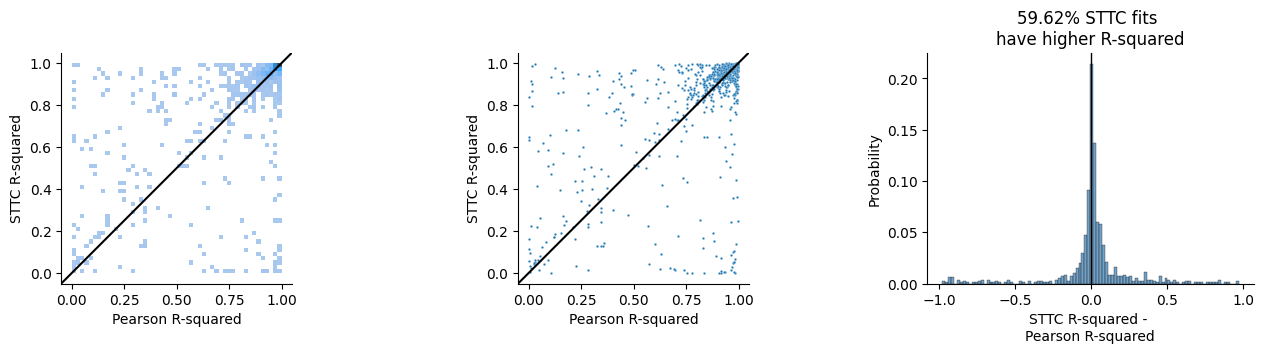

In [22]:
n_sttc_better = len(df_merged.query('diff > 0'))
n_sttc_better_perc = n_sttc_better / len(df_merged) * 100

fig, axes = plt.subplots(1,3, figsize=(16,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, bins=50)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('Pearson R-squared')
axes[0].set_ylabel('STTC R-squared')

sns.scatterplot(ax=axes[1], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, s=3)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson R-squared')
axes[1].set_ylabel('STTC R-squared')

sns.histplot(ax=axes[2], x=df_merged['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[2].axvline(x=0, lw=1, c='k')
axes[2].set_xlabel('STTC R-squared - \nPearson R-squared')
axes[2].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)))

sns.despine()

In [27]:
n_95_fits_sttc = len(df_merged.query('r_squared_sttc >= 0.8'))
n_95_fits_pearson = len(df_merged.query('r_squared_pear >= 0.8'))

print('n_95_fits_sttc {}, n_95_fits_pearson {}'.format(n_95_fits_sttc, n_95_fits_pearson))

n_95_fits_sttc 621, n_95_fits_pearson 596


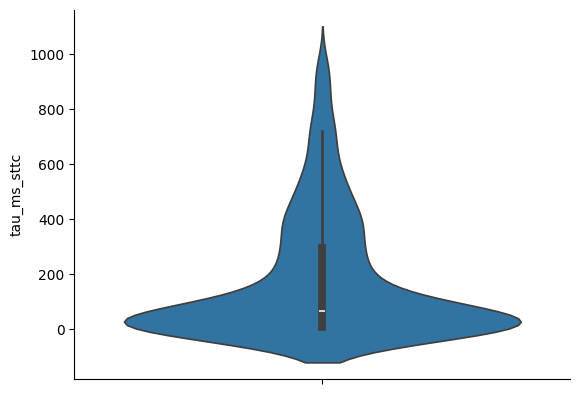

In [31]:
sns.violinplot(y='tau_ms_sttc', data=df_merged.query('tau_ms_sttc > 0 and tau_ms_sttc <= 1000'))
sns.despine()